<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Exploratory data analysis and feature extraction. </h2>	


<h5> In this section, Compute at least 15 such image features (a method for each), including the following (NOTE: At least 10 of these must be scalar features and 2 matrix-based features): (i) image size, (ii) average of the red-channel intensity, (iii) aspectratio. This will require significant explatoratory research and data analysis. The first one is already implemented for you, and the next two are pre-specified. Additional requirements specfied in pdf. </h5>

In [2]:
%store -r starting_data
%store -r validation_data
import numpy as np
import cv2
import skimage
import matplotlib.pyplot as plt
import copy
from skimage import feature, color, data
%matplotlib inline

In [2]:
bear = starting_data[starting_data['Encoding'] == 1]

In [4]:
a = copy.copy(bear['Image'].iloc[11])

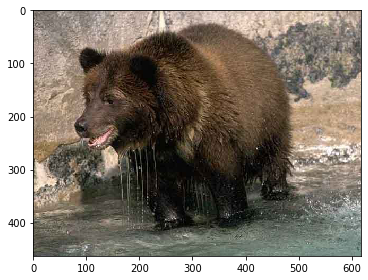

In [5]:
skimage.io.imshow(a)

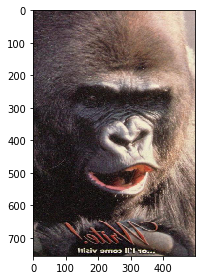

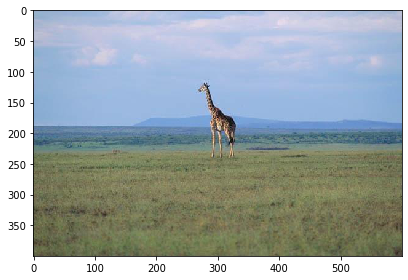

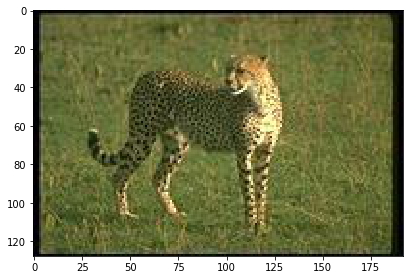

In [9]:
#Three of the learning set images

img1 = skimage.io.imshow(starting_data["Image"].iloc[10])
plt.show()

img2 = skimage.io.imshow(starting_data["Image"].iloc[500])
plt.show()

img3 = skimage.io.imshow(starting_data["Image"].iloc[1200])
plt.show()

In [10]:
#image size
def ft0(image):
    return image.size

#average of the red-channel intensity
def ft1(image):
    return image[:, :, 0].mean()
    
#aspectratio
def ft2(image):
    return image.shape[0] / image.shape[1]

#average of the green-channel intensity
def ft3(image):
    return image[:, :, 1].mean()

#average of the blue-channel intensity
def ft4(image):
    return image[:, :, 2].mean()

#Harris Corner Detector, return an array contain Corner score for each pixel
def ft5(image):
    bgr_img = image[:, :, ::-1] # RGB -> BGR
    gray = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)

    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None)
    return dst

#SIFT
def ft6(image):
    bgr_img = image[:, :, ::-1] # RGB -> BGR
    gray = cv2.cvtColor(bgr_img,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp = sift.detect(gray,None)
    img2 = img.copy()
    img=cv2.drawKeypoints(gray,kp,img2)
    return img

#SURF
def ft7(image):
    bgr_img = image[:, :, ::-1] # RGB -> BGR
    surf = cv2.xfeatures2d.SURF_create(400)
    kp, des = surf.detectAndCompute(bgr_img,None)
    img2 = img.copy()
    img=cv2.drawKeypoints(img2,kp,None,(255,0,0),4)
    return img

#Hough Transform
def ft8(image):
    bgr_img = image[:, :, ::-1] # RGB -> BGR
    image = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

#Haralick texture feature vector
def ft9(image):
    bgr_img = image[:, :, ::-1] # RGB -> BGR
    image = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(image).mean(axis=0)
    return haralick

#Color Histogram
def ft9(image):
    bgr_img = image[:, :, ::-1] # RGB -> BGR
    # convert the image to HSV color-space
    image = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    hist.flatten()
    
def ft10(image):
    return image[:,:,0].std()
    
def ft11(image):
    return image[:,:,1].std()
    
def ft12(image):
    return image[:,:,2].std()
    
def ft13(image):
    return skimage.feature.hog(image, visualize = False, feature_vector = True).mean()
    
def ft14(image):
    return skimage.feature.hog(image, visualize = False, feature_vector = True).std()
    
def ft15(image):
    return skimage.color.rgb2hsv(image)[:, :, 0].std()

def ft16(image):
    return skimage.color.rgb2hsv(image)[:, :, 1].std()

def ft17(image):
    return skimage.color.rgb2hsv(image)[:, :, 2].std()
    


In [37]:
def ft0(image):
    return image.size
# Returns the pixel size of the image

def ft1(image):
    return image[:, :, 0].mean()
# Returns the average of the red-channel pictures for the images
def ft2(image):
    return image[:, :, 1].mean()
# Returns the average of the green-channel pictures for the images
def ft3(image):
    return image[:, :, 2].mean()
# Returns the average of the blue-channel pictures for the images

def ft4(image):
    return image[:, :, 0].std()
# Returns the std of the red-channel pictures for the images
def ft5(image):
    return image[:, :, 1].std()
# Returns the std of the green-channel pictures for the images
def ft6(image):
    return image[:, :, 2].std()
# Returns the std of the blue-channel pictures for the images

def ft7(image):
    return image.shape[0] / image.shape[1]
#Returns the aspect ratio of the image

def ft8(image):
    return skimage.color.rgb2hsv(image)[:, :, 0].mean()
# Returns the average of the Hue pictures for the images
def ft9(image):
    return skimage.color.rgb2hsv(image)[:, :, 1].mean()
# Returns the average of the Saturation pictures for the images
def ft10(image):
    return skimage.color.rgb2hsv(image)[:, :, 2].mean()
# Returns the average of the Value pictures for the images

def ft11(image):
    return skimage.color.rgb2hsv(image)[:, :, 0].std()
# Returns the std of the Hue pictures for the images
def ft12(image):
    return skimage.color.rgb2hsv(image)[:, :, 1].std()
# Returns the std of the Saturation pictures for the images
def ft13(image):
    return skimage.color.rgb2hsv(image)[:, :, 2].std()
# Returns the std of the Value pictures for the images

def ft14(image):
    grayscale = skimage.color.rgb2gray(image)
    return np.array(corner_peaks(corner_shi_tomasi(grayscale))).mean()
# Returns the average of Shi Tomasi edges for the images
def ft15(image):
    grayscale = skimage.color.rgb2gray(image)
    return np.array(corner_peaks(corner_shi_tomasi(grayscale))).std()
# Returns the std of Shi Tomasi edges for the images

# def ft16(image):
#     grayscale = skimage.color.rgb2gray(image)
#     return np.array(corner_peaks(corner_harris(grayscale))).mean()
# # Returns the average of Harris features for the images
# def ft17(image):
#     grayscale = skimage.color.rgb2gray(image)
#     return np.array(corner_peaks(corner_harris(grayscale))).std()
# # Returns the std of Harris features for the images

def ft18(image):
    return skimage.feature.hog(image, visualize = False,feature_vector=True).mean()
# Returns the average of HOG flattened vector for the images
def ft19(image):
    return skimage.feature.hog(image, visualize = False,feature_vector=True).std()
# Returns the std of HOG flattened vector for the images

def ft_hog(image):
    image = skimage.color.rgb2gray(image)
    image = skimage.transform.resize(image, (64, 64), mode='reflect')
    ppc = 32
    fd = skimage.feature.hog(image, orientations=9, pixels_per_cell=(ppc, ppc), 
                        cells_per_block=(2, 2), block_norm= 'L2', visualize=False)
    return fd

def ft_lbp(image):
    image = skimage.color.rgb2gray(image)
    image = skimage.transform.resize(image, (64, 64), mode='reflect')
    radius = 3
    n_points = 8 * radius
    lbp = skimage.feature.local_binary_pattern(image, n_points, radius, 'uniform')
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
    return hist

 We expect all external sources sited, and significant indication of EDA. 

In [35]:
def feature_frame(df):
    df["size"] = df["Image"].apply(ft0)
    #df["red_mean"] = df["Image"].apply(ft1)
    df["aspect_ratio"] = df["Image"].apply(ft2)
    #df["green_mean"] = df["Image"].apply(ft3)
    #df["blue_mean"] = df["Image"].apply(ft4)
    df["red_std"] = df["Image"].apply(ft10)
    df["green_std"] = df["Image"].apply(ft11)
    df["blue_std"] = df["Image"].apply(ft12)
    df["hog_mean"] = df["Image"].apply(ft13)
    df["hog_std"] = df["Image"].apply(ft14)
    df["hue_std"] = df["Image"].apply(ft15)
    df["saturation_std"] = df["Image"].apply(ft16)
    df["value_std"] = df["Image"].apply(ft17)
    del df["Image"]
    return df

In [38]:
feature_frame(starting_data)

IndexError: too many indices for array

In [14]:
starting_data.head()

,Image,Picture,Encoding,size
0,"[[[143, 142, 147], [222, 221, 226], [205, 204,...",gorilla,9,NaN
1,"[[[106, 109, 116], [105, 108, 115], [100, 103,...",gorilla,9,NaN
2,"[[[125, 141, 140], [103, 119, 118], [89, 105, ...",gorilla,9,NaN
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",gorilla,9,NaN
4,"[[[119, 122, 103], [104, 107, 88], [102, 105, ...",gorilla,9,NaN


In [ ]:
for i in range(add_feature_df.shape[0]):
    for j in range(len(add_feature_df["new_hog"].iloc[i])):
        spread_feature_df.loc[i,"new_hog"+str(j)]=add_feature_df["new_hog"].iloc[i][j]
# spread_feature_df.head()

In [10]:
starting_data['red_mean'] = starting_data['Image'].map(lambda x: x[:, :, 0].mean(), axis=1)

TypeError: map() got an unexpected keyword argument 'axis'

In [8]:
a = starting_data['Image'].head()

In [1]:
starting_data['Image'].apply(lambda x: x[0].mean())

NameError: name 'starting_data' is not defined

In [32]:
starting_data['Image'].iloc[10]

50

In [25]:
starting_data['Image'].iloc[10][:, :, 0].mean()

103.9073201058201

<h4> Graphs </h4>

<h4> Sources </h4>

<h4> DataFrame Creation </h4>

In [1]:
def feature_frame(df):
    return df
    #Returns data-frame with all the features now inside, and calculated


In [2]:
feature_frame(data_from_nb1)

NameError: name 'data_from_nb1' is not defined